In [118]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
heads=["CRIM","ZN", "INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
Data = pd.read_csv("housing.csv",names=heads,delim_whitespace=True)
data = np.array(Data)
scaler = StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)
x_data=np.hsplit(data_scaled,[13,14])[0]
y_data=np.hsplit(data_scaled,[13,14])[1]
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True,random_state=8)
x_train,x_val,y_train,y_val=train_test_split(x_data,y_data,test_size=0.25,shuffle=True,random_state=8)



In [119]:
mse_a_val=[]
x_degree=[]
for i in range(6):
    i+=1
    x_train_poly=PolynomialFeatures(degree=i, include_bias=False).fit_transform(x_train)
    model = LinearRegression().fit(x_train_poly, y_train)
    x_val_poly=PolynomialFeatures(degree=i, include_bias=False).fit_transform(x_val)
    y_val_pred = model.predict(x_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    mse_a_val.append(mse)
    x_degree.append(i)
min_mse=min(mse_a_val)
min_mse_degree=mse_a_val.index(min_mse)+1
print(mse_a_val)
print(x_degree)

[0.26870840680634883, 0.13572198647729686, 38.33436402195643, 10.756567661988322, 9.082819425319707, 57.538944719912216]
[1, 2, 3, 4, 5, 6]


0.13572198647729686
2


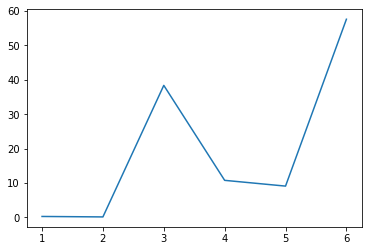

In [120]:
plt.plot(x_degree,mse_a_val)
print(min_mse)
print(min_mse_degree)

In [121]:
x_train_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_train)
model = LinearRegression().fit(x_train_poly, y_train)
x_test_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_test)
y_test_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

0.13956752319340554


In [143]:
lambdas = np.arange(0, 10, step=0.1)
lambdas_arr=[]
for j in range(10):
    n=random.randint(0,99)
    lambdas_arr.append(lambdas[n])
lambdas_arr.sort()
print(lambdas_arr)

[0.4, 0.5, 0.8, 1.3, 3.5, 3.9000000000000004, 4.9, 5.6000000000000005, 7.4, 7.6000000000000005]


In [144]:
x_train_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_train)
x_val_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_val)
mse_lambda=[]
for j in range(10):
    regular = ElasticNet(alpha=lambdas_arr[j],fit_intercept=False,random_state=0,max_iter=100).fit(x_train_poly,y_train)
    y_val_pred = regular.predict(x_val_poly)
    mse_lambda.append(mean_squared_error(y_val,y_val_pred))
print(mse_lambda)
perf_lambda_mse=min(mse_lambda)
index=mse_lambda.index(perf_lambda_mse)
perf_lambda=lambdas_arr[index]
print(perf_lambda_mse)
print(perf_lambda)

[0.3408366725769399, 0.3843894434861227, 0.5300870247254058, 0.8294343481798414, 0.956288993948997, 0.956288993948997, 0.956288993948997, 0.956288993948997, 0.956288993948997, 0.956288993948997]
0.3408366725769399
0.4


In [145]:
x_train_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_train)
x_test_poly=PolynomialFeatures(degree=min_mse_degree, include_bias=False).fit_transform(x_test)
regular = ElasticNet(alpha=perf_lambda,fit_intercept=False,random_state=0,max_iter=100).fit(x_train_poly,y_train)
y_test_pred = regular.predict(x_test_poly)
print(mean_squared_error(y_test,y_test_pred))

0.36189792728903836
